In [74]:
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

import numpy as np
import sys
import os
import tensorflow as tf

In [2]:
seed = 1234
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

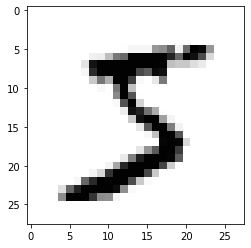

In [86]:
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [95]:
for x in X_train[0]:
    for i in x:
        print('%4d' %(i), end="")
    print('\n')

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

   0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0

   0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0

   0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0

   0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_train = X_train.reshape(len(X_train), -1) # 차원 변환
# X_train = X_train.reshape(X_train.shape[0], 784)
# X_train = X_train.reshape(X_train.shape[0], -1) # 1차원 배열로 전환
X_train = X_train.astype('float32') / 255 # normalize 0 to 1

In [18]:
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
print("class : %d " %(Y_class_train[0]))

class : 5 


In [8]:
# one hot encoding
Y_train = to_categorical(Y_class_train, 10)
Y_test = to_categorical(Y_class_test, 10)

In [113]:
Y_train.shape, Y_test.shape

((60000, 10), (10000, 10))

In [99]:
Y_train2 = np_utils.to_categorical(Y_class_train) # to_categorical 뒤에 10을 넣어도 마찬가지
Y_train2[0] == Y_train[0]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [9]:
print(Y_train[0]) # 5 확인

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [64]:
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [67]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [13]:
model_path = '/model/{epoch:02d}-{val_loss:.4f}.hdf5'

In [65]:
checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [19]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((60000, 784), (10000, 784), (60000, 10), (10000, 10))

In [57]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30 , batch_size=200, verbose=0, 
                    callbacks=[early_stopping_callback, checkpoint])
print('\n Test Accuracy: % .4f' % (model.evaluate(X_test, Y_test)[1]))


Epoch 00001: val_loss improved from inf to 0.15686, saving model to /model\01-0.1569.hdf5

Epoch 00002: val_loss improved from 0.15686 to 0.10505, saving model to /model\02-0.1050.hdf5

Epoch 00003: val_loss improved from 0.10505 to 0.08728, saving model to /model\03-0.0873.hdf5

Epoch 00004: val_loss improved from 0.08728 to 0.07376, saving model to /model\04-0.0738.hdf5

Epoch 00005: val_loss improved from 0.07376 to 0.07131, saving model to /model\05-0.0713.hdf5

Epoch 00006: val_loss improved from 0.07131 to 0.06367, saving model to /model\06-0.0637.hdf5

Epoch 00007: val_loss did not improve from 0.06367

Epoch 00008: val_loss improved from 0.06367 to 0.06140, saving model to /model\08-0.0614.hdf5

Epoch 00009: val_loss improved from 0.06140 to 0.06092, saving model to /model\09-0.0609.hdf5

Epoch 00010: val_loss did not improve from 0.06092

Epoch 00011: val_loss did not improve from 0.06092

Epoch 00012: val_loss did not improve from 0.06092

Epoch 00013: val_loss did not impro

In [68]:
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=30 , batch_size=200, verbose=0, 
                    callbacks=[early_stopping_callback, checkpoint])
print('\n Test Accuracy: % .4f' % (model.evaluate(X_test, Y_test)[1]))


Epoch 00001: val_loss improved from inf to 0.17015, saving model to /model\01-0.1701.hdf5

Epoch 00002: val_loss improved from 0.17015 to 0.12204, saving model to /model\02-0.1220.hdf5

Epoch 00003: val_loss improved from 0.12204 to 0.10405, saving model to /model\03-0.1040.hdf5

Epoch 00004: val_loss improved from 0.10405 to 0.08770, saving model to /model\04-0.0877.hdf5

Epoch 00005: val_loss improved from 0.08770 to 0.08676, saving model to /model\05-0.0868.hdf5

Epoch 00006: val_loss improved from 0.08676 to 0.07735, saving model to /model\06-0.0773.hdf5

Epoch 00007: val_loss did not improve from 0.07735

Epoch 00008: val_loss did not improve from 0.07735

Epoch 00009: val_loss improved from 0.07735 to 0.07387, saving model to /model\09-0.0739.hdf5

Epoch 00010: val_loss improved from 0.07387 to 0.07323, saving model to /model\10-0.0732.hdf5

Epoch 00011: val_loss did not improve from 0.07323

Epoch 00012: val_loss improved from 0.07323 to 0.07261, saving model to /model\12-0.072

In [33]:
dir(history)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_chief_worker_only',
 '_implements_predict_batch_hooks',
 '_implements_test_batch_hooks',
 '_implements_train_batch_hooks',
 '_keras_api_names',
 '_keras_api_names_v1',
 '_supports_tf_logs',
 'epoch',
 'history',
 'model',
 'on_batch_begin',
 'on_batch_end',
 'on_epoch_begin',
 'on_epoch_end',
 'on_predict_batch_begin',
 'on_predict_batch_end',
 'on_predict_begin',
 'on_predict_end',
 'on_test_batch_begin',
 'on_test_batch_end',
 'on_test_begin',
 'on_test_end',
 'on_train_batch_begin',
 'on_train_batch_end',
 'on_train_begin',
 'on_train_end',
 'params',
 'set_model',
 'set_params',
 'validation_data']

In [51]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30 , batch_size=200, verbose=0)
print('\n Test Accuracy: % .4f' % (model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 0s 1ms/step - loss: 0.0774 - accuracy: 0.9844

 Test Accuracy:  0.9844


In [39]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [58]:
loss = history.history['loss']
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

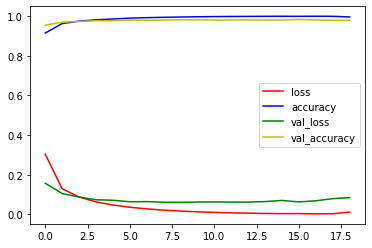

In [59]:
plt.plot(loss, 'r', label='loss')
plt.plot(accuracy, 'b', label='accuracy')
plt.plot(val_loss, 'g', label='val_loss')
plt.plot(val_accuracy, 'y', label='val_accuracy')
plt.legend()
plt.show()

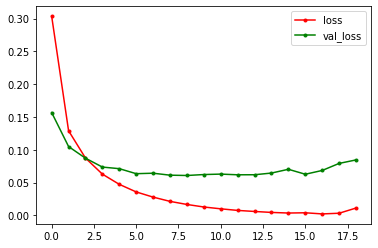

In [72]:
plt.plot(loss, marker='.', c='r', label='loss')
plt.plot(val_loss, marker='.', c='g', label='val_loss')
plt.legend()
plt.show()

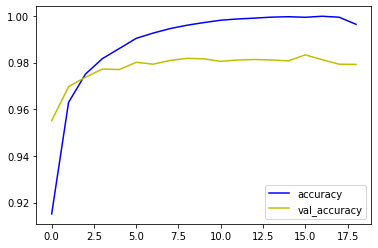

In [73]:
plt.plot(accuracy, 'b', label='accuracy')
plt.plot(val_accuracy, 'y', label='val_accuracy')
plt.legend()
plt.show()